<a href="https://colab.research.google.com/github/shaevitz/MOL518-Intro-to-Data-Analysis/blob/main/Lecture_10/MOL518_Lecture10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# In colab run this cell first to setup the file structure!
%cd /content
!rm -rf MOL518-Intro-to-Data-Analysis

!git clone https://github.com/shaevitz/MOL518-Intro-to-Data-Analysis.git
%cd MOL518-Intro-to-Data-Analysis/Lecture_10

/content
Cloning into 'MOL518-Intro-to-Data-Analysis'...
remote: Enumerating objects: 876, done.
remote: Counting objects: 100% (131/131), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 876 (delta 113), reused 110 (delta 102), pack-reused 745 (from 1)
Receiving objects: 100% (876/876), 27.37 MiB | 16.55 MiB/s, done.
Resolving deltas: 100% (363/363), done.
/content/MOL518-Intro-to-Data-Analysis/Lecture_10


# Lecture 10: Simulating random numbers and distributions

In this class, we will learn how to generate random numbers from different probability distributions and plot them in Python using Jupyter Notebooks running in Google Colab.

The goals of this lecture are to:

1.	Teach you how to generate random numbers
2.	Teach you how to simulate probability distributions using random number generation
3. Allow you to calculate a confidence interval using bootstrapping


-----


## TL;DR: Biology is complicated!



- The examples in the last lecture emphasize situations where the binomial, normal, poisson, and exponential distributions explain a dataset
- Real biology is often more complicated than this!
- Examples of this include bimodal distributions, skewed distributions, power law distributions, or something more complex (mixtures of distributions, for example)
- We will go over a few more concrete examples later in this notebook


## Why do we need to generate random numbers, anyways?

1. It's helpful as a learning exercise, to teach you what a probability distribution is.

2. Sometimes we want to simulate the potential results of an experiment before actually running it, or compare your results to an existing model. For example, if you are making a bunch of measurements, you might want to see if they look normally distributed, as they ought to.

3. Bootstrapping (resampling from existing data) is a powerful way to estimate error when we don't know the distribution our dataset comes from. It is also useful if you run a pilot experiment prior to running a larger one (often needed when doing animal work).

We will discuss bootstrapping further later today.


-----

## Random number generation in Python

There are two ways to generate random numbers in Python - there is a built-in ```random``` package, as well as more sophisticated random number generators as part of the ```numpy.random``` package. We will start with the built-in package so that you can understand how the process works.



### What is the simplest way to generate a random number in Python?

The simplest approach uses the aptly-named ```random.random()``` function, which generates a random floating point number between zero and one. Technically, the output can be equal to zero but should always be at least ever so slightly less than one.



### Example 1: Flipping an unbiased coin

In this initial example I will show you how to simulate a series of unbiased coin flips.

In [ ]:
# We need to import the random package
import random

# number of times to flip the coin
nflips = 100
nheads = 0

#
for i in range(nflips):
  r = random.random()
  if r < 0.5:
    print('Heads')
    nheads = nheads+1
  else:
    print('Tails')

print('Number of heads: ', nheads)

### Exercise 1

Now, write some code below to simulate 10,000 coin flips.

Note: you may not want to display the results of each coin flip any more. You can copy the code from Example 1 above as a starting point. Please do not use generative AI for this exercise.

In [ ]:
# Code for Exercise 1 goes here!


### Exercise 2

Make a version of the code above that runs 100 simulations of 100 coin flips each. Plot a histogram of the number of heads observed in each simulation. Also calculate the mean and standard deviation of the distribution of the number of heads observed in each simulation.

Note: You can copy the code from Example 1 above as a starting point. Please do not use generative AI for this exercise.

In [ ]:
# Write your code for Exercise 2 here




#### Excercise 2 questions

Once you have run your code, please answer the following questions:

1. Based on the histogram, which distribution did you generate with the coin flips?

**[your answer goes here]**

2. What is the mean number of heads across all simulations? Is this what you would have expected?

**[your answer goes here]**

3. Is the standard deviation what you would have expected based on the distribution?

**[your answer goes here]**

The answers you provide here will not be graded, but will be helpful feedback for developing the course

## An introduction to bootstrapping: one 'weird trick' for converting "small data" into big data

If our data follow one of the four "Great Distributions", it is easy to estimate the variance and standard deviation using the formulas I gave you in the previous lecture. However, sometimes in science we find that our data do not fit one of those distributions.

We start with a sample dataset, consisting of a set of measurements. Then, we repeatedly resample the data with replacement, generating a series of resamples from our original sample dataset. We can then calculate our desired statistic (for example, the mean) on each of the resamples, generating a distribution of means.

We then can calculate (for example) a 95% confidence interval by looking at a histogram of the distribution of means of the resamples. In this specific example, the 95% confidence interval would go from the 2.5th percentile to the 97.5th percentile.

This approach is called "case resampling", and is the simplest method for bootstrapping. There are other, more complicated methods out there that may sometimes be helpful, but we will not be covering them in this course.

**[some graphic explaining bootstrapping]**

The example given here has focused on the mean, but the same approach can be applied to other estimators (e.g. median). It's not a good idea to use bootstrapping for extreme statistics (e.g., the max or min of a dataset).

### Three key questions may emerge:

1. How much data do I need to use bootstrapping? There is no strict definition of this, but a rule of thumb is that the sample size should be *at least 30*. That said, you can use bootstrapping even with smaller samples, even as low as 10-15 samples. Just know that the performance will not be as good as with a larger sample size (the error will be larger).

2. Are there any other assumptions baked into boostrapping? Yes! it is also important that the samples are *independent and are coming from the same distribution*, as this is a key assumption of the bootstrapping approach. In statistics we often refer to this as being independent and identically distributed or i.i.d. for short.

3. How many times to I need to do the resampling? *More is better, but 1,000-10,000 resamples is usually enough to give a good estimate of the standard error.* There is a bit of a tradeoff here between computing time and accuracy, so if it takes a very long time to compute 10,000 resamples, you can reduce the number of resamples.

### The pros and cons of bootstrapping:

**Pros**
1. It's simple to calculate!
2. Bootstrapping is helpful for calculating standard error & confidence intervals
3. Works even when we don't know what the distribution is

**Cons**
1. Simple bootstrapping (as described here) assumes the variance is finite, which may not always be true if your data have a lot of outliers or a long tail.
2. Bootstrapping does not usually work well when the size of the sample dataset is small (below 30).
3. If we do know the distribution, we are probably better off using other methods for estimating error

*Note:* You might be wondering: why do we do the sampling with replacement? Sampling without replacement would actually not be helpful here as we would just be reproducing the original sample dataset exactly (or a subset of it). Also, it would break the i.i.d. assumption

### Example 2

In this example, I will show you how to resample from eggsize. This is essentially one iteration of bootstrapping.

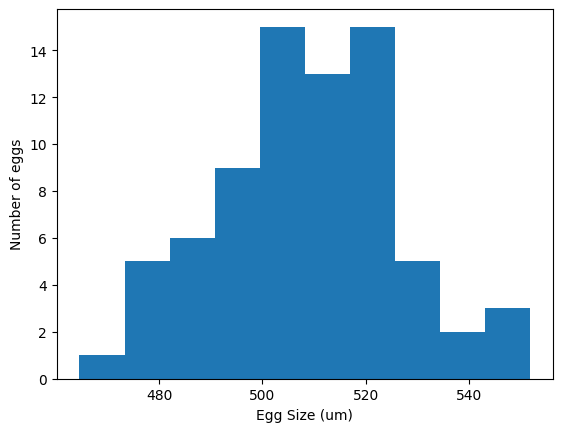

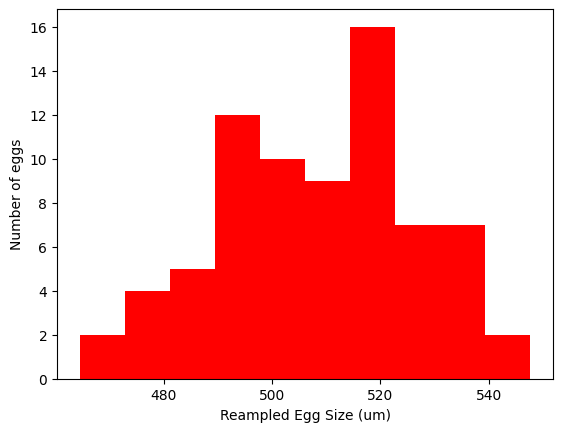

In [16]:
# We need to import the numpy package to compute the mean and the median
import random
import numpy as np
import matplotlib.pyplot as plt

eggarray = np.loadtxt('data/egg_measurements.csv', delimiter = ',', skiprows=1) # skip the first row since it is a header
eggsize = eggarray[:,1] # egg size is the first column of the dataset, egg length is the second column of the dataset

resamp = []
for i in range(len(eggsize)):
  randi = int(random.random()*(len(eggsize)-1)) # generate a random index within eggsize
  resamp.append(eggsize[randi]) # index into eggsize using randi

plt.hist(eggsize, bins=10)
plt.xlabel('Egg Size (um)')
plt.ylabel('Number of eggs')
plt.show()

plt.hist(resamp, bins=10,facecolor='r')
plt.xlabel('Reampled Egg Size (um)')
plt.ylabel('Number of eggs')
plt.show()


### Exercise 3

Now, write some code to resample eggsize 1,000 times, recording the mean of each resampled array. Plot a histogram of the means of each resampled array.

Also calculate the 95% confidence interval for the mean of eggsize using the resampled data.

In [ ]:
# Your code for Exercise 3 goes here

### Questions related to Exercise 3

1. How does the mean of the resampled arrays compare to the mean of eggsize?

**[Your answer goes here]**

2. How large is the 95% confidence interval for the mean of eggsize? Is it larger or smaller than you expected?

**[Your answer goes here]**

3. What is the distribution of the resampled means?

**[Your answer goes here]**

### Exercise 4

Please estimate the standard deviation of egg length (not egg *size*) using bootstrapping with 1,000 resamplings.

For this exercise, I would like you to try using the ```scipy.stats.bootstrap()``` function. You can find a link to the documentation for that function [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html).

In [ ]:
# Your code for Exercise 4 goes here

# Bonus exercises

If you have time, or would like extra practice after class, please complete the following exercises. Please note that they are a bit harder than the regular exercises (that is on purpose!).

## Bonus Exercise 1

Please estimate the variance of egg length using bootstrapping with 1,000 resamplings. How does this compare to your estimate of the standard deviation of egg length from Exercise 4?

In [ ]:
# Code for Bonus Exercise 1 goes here


Your answer to the question goes here:



## Bonux Exercise 2

Please estimate the mean of egg length using 100, 1,000, and 10,000 resamplings, and plot histograms of each of the resampled arrays.

You can use either the script we developed in class, or the ```scipy.stats.bootstrap()``` function for this exercise.

In [ ]:
# Code for Bonus Exercise 2 goes here


### Questions related to Bonus Exercise 2

1. How do your estimates with varying numbers of resamplings compare to one another?